<a href="https://colab.research.google.com/github/DamiAladesuru/MachineLearning2023/blob/main/6800_Day1_Damilola_Aladesuru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 1 : Code used during lecture and lab assignment

### Instructions

- The notebook combines 'code used during lecture' with the 'Day 1 lab' assignment (see further down)
- The lab assignment can be done largely by copying/paste/modification of the code used during the lecture
- Please add answers/discussion/comments to the notebook as comments or text box. Do not create another file in addition.
- When you are done with your assignment, save the notebook in drive and add your last name to the name of the file.
- To hand in the final notebook follow the instructions provided by email

# Code used during lecture



In [3]:
# Import libaries that will be used in the notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
import seaborn as sns
import os

In [4]:
# run this cell only once if you don't have wget installed
# its assumed you are using windows and have python installed
# only needed if you are running the notebook locally
# %pip install wget
#if not os.path.isfile('brazil_all_data_v2.gz'):
#    !python -m wget  https://ilr-ml.s3.eu-central-1.amazonaws.com/brazil_all_data_v2.gz
# Download data only once and make sure it is in the same folder as the notebook

# check if brazil_all_data_v2.gz is available in the current folder and if not, download it

if not os.path.isfile('brazil_all_data_v2.gz'):
    !wget  https://ilr-ml.s3.eu-central-1.amazonaws.com/brazil_all_data_v2.gz



In [5]:
# Load data with pandas into a dataframe
df = pd.read_parquet('brazil_all_data_v2.gz')

In [6]:
# Have a look at the data
print('Number of rows:', df.shape[0])
df.head(5)

Number of rows: 249940


,id,row,col,lon,lat,bean,carrot,cassava,chickpea,citrus,...,tot_defor_2010_lag_3rd_order,tot_defor_2011_lag_3rd_order,tot_defor_2012_lag_3rd_order,tot_defor_2013_lag_3rd_order,tot_defor_2014_lag_3rd_order,tot_defor_2015_lag_3rd_order,tot_defor_2016_lag_3rd_order,tot_defor_2017_lag_3rd_order,tot_defor_2018_lag_3rd_order,s
0,0,0,0,-59.989876,-10.010125,200.00000,335.00000,201.0,0.0,391.0,...,1.800000,1.333333,6.866667,0.733333,2.200000,4.466667,9.866667,6.600000,0.800000,1
1,1,0,1,-59.969875,-10.010125,200.00000,335.00000,201.0,0.0,391.0,...,1.052631,2.000000,5.105263,0.526316,0.947368,1.473684,9.473684,6.210527,2.000000,1
2,2,0,2,-59.949875,-10.010125,200.00000,335.00000,201.0,0.0,391.0,...,3.652174,1.652174,5.913043,4.086957,4.521739,4.956522,8.695652,11.217392,5.173913,1
3,3,0,3,-59.929874,-10.010125,200.00000,335.00000,201.0,0.0,391.0,...,3.814815,2.666667,5.407407,4.000000,3.925926,3.703704,5.888889,19.629629,6.518518,1
4,4,0,4,-59.909874,-10.010125,218.33334,435.83334,216.0,0.0,523.5,...,8.296296,2.629630,5.222222,7.592592,5.370370,4.481482,8.888889,18.888889,5.222222,1


In [7]:
# Define target (dependent) variable (% forest cover for 2018)
strY = 'perc_treecover'


# Define a list of features names (explantory variables)
lstX = [
  'wdpa_2017',
  'population_2015',
  'chirps_2017',
  'maize',
  'soy',
  'sugarcane',
  'perm_water',
  'travel_min',
  'cropland',
  'mean_elev',
  'sd_elev',
  'near_road',
 ]



Run OLS on forest cover

In [8]:
# Get target variable and features
Y_all = df[strY]
X_all = df.loc[:,lstX]

In [9]:
# Run OLS using sklearn
# We run an regression using sklearn which is one of the most popular
# libaries for machine learning

# Define model (automatically add a constant)
regOls = LinearRegression(fit_intercept=True)
# Alternative specification as a pipline with automatically scaling the data, however, not necessary for OLS
# regOls = make_pipeline(StandardScaler(with_mean=False), LinearRegression(fit_intercept=True))

# Fit model
regOls.fit(X_all, Y_all)

LinearRegression()

In [10]:
from scipy.stats import norm
# View regression results
# Note: Sklearn is not econometric package and does not provide our classical
# regression table output. This is not what the machine learning community
# looks at. However, we can calculate these things manually.

# Get coef
coefs = np.hstack((regOls.intercept_, regOls.coef_))

N = Y_all.shape[0]
K = coefs.shape[0]

# Get predicted values y hat
Y_hat = regOls.predict(X_all)
# Get errors
err = Y_all-Y_hat
# Get standard error of regression
sig2 = (err.transpose() @ err) / (N-K)
sig2

# Add constant to X_all (sklearn did this automatically)
Xc_all = np.insert(np.array(X_all), 0, 1, axis = 1)

# Covariance matrix for coef
VarBeta = sig2 * np.linalg.inv(Xc_all.T @ Xc_all)
# Standard error of coef
se = np.sqrt(np.diag(VarBeta))
# t-values
t =  coefs/se
# p-values
p = (1 - norm.cdf(abs(t))) * 2
# Prepare df as output
resOls = pd.DataFrame(coefs,index=['const']+lstX,columns=['beta'])
resOls['SE'] = se
resOls['t'] = t
resOls['p-value'] = p
resOls

,beta,SE,t,p-value
const,-5.831235,1.324112,-4.403882,0.000011
wdpa_2017,11.427969,0.156940,72.817276,0.000000
population_2015,-0.008522,0.000677,-12.595832,0.000000
chirps_2017,0.036649,0.000314,116.867636,0.000000
maize,0.019095,0.000159,120.445045,0.000000
soy,-0.030865,0.000407,-75.758273,0.000000
sugarcane,-0.003199,0.000141,-22.739455,0.000000
perm_water,-21.908606,1.184469,-18.496556,0.000000
travel_min,0.019945,0.000139,143.456389,0.000000
cropland,-1.174515,0.540421,-2.173335,0.029755


In [11]:
# To confirm the results we can use the OLS function in the statsmodel libary.
# This is more a statistical libary, not typically used for machine learning,
# but providing our typicall regression output

import statsmodels.api as sm

olsStats = sm.OLS(Y_all, np.insert(np.array(X_all), 0, 1, axis = 1))
# Set the names of the explanatory variables
olsStats.data.xnames = ['const']+lstX
olsStats_result = olsStats.fit()
print(olsStats_result.summary())

                            OLS Regression Results                            
Dep. Variable:         perc_treecover   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                 1.688e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:34:46   Log-Likelihood:            -1.1677e+06
No. Observations:              249940   AIC:                         2.335e+06
Df Residuals:                  249927   BIC:                         2.336e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.8312      1.324     


Mean squared error:  669.0920641940289
Coefficient of determination:  0.44772019128724727


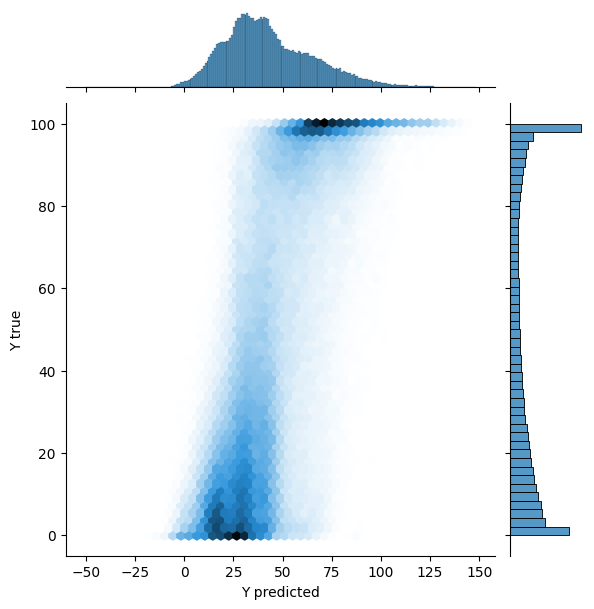

In [12]:
# Now we want to see how good our OLS regression performs in sample
# i.e. on the training data itself

# Make predictions for the same dataset X_all
Y_hat = regOls.predict(X_all)

# The mean squared error
mse_ols_sklearn  = mean_squared_error(Y_all,Y_hat)
print('\nMean squared error: ',mse_ols_sklearn)
# The coefficient of determination: 1 is perfect prediction
R2_ols_sklearn = r2_score(Y_all,Y_hat)
print('Coefficient of determination: ',R2_ols_sklearn)

# plot Y vs Y-hat
h = sns.jointplot(x=Y_hat, y=Y_all, kind="hex")
h.set_axis_labels('Y predicted', 'Y true');

Now we explore what consequences it has if a model overfits. For this we generate interaction and squared terms and compare model performance in a training and test set approach.

In [13]:
# Set a random number seed such that everybody has the same "random" split
# of the data
np.random.seed(111)
# Split the data into train and test data using sklearn train_test_split object
#   (see: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

#   Note: This randomly split the data in 80% train and 20% test data
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size = 0.2)

In [14]:
# In order to better illustrate the overfitting effects we
# artificially reduce the training data size.  Why do we do this? In general
# a larger sample size helps to reduce overfitting problems. With a smaller
# sample size polynomials of order 2 of our variables are sufficient to show
# the effects. With the full sample size we would need to consider much higher
# polynomials to show the same effects.
N = 2000
X_train = X_train.iloc[:N,:]
Y_train = Y_train.iloc[:N]


In [15]:
# Use an sklearn function to generate polynomials of order 2
# (square terms and interaction terms)
# (see https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures.get_feature_names)
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print('Total number of avaliable features',X_train_poly.shape[1])
lstFeatures = poly.get_feature_names_out()
# Show feature names
# list(lstFeatures)



Total number of avaliable features 91


In [16]:
# To explore overfitting we now run an small simulation...
# we squentially increase our model complexity by adding on additional features.
# In each case we estimate the model and obtain models stats
# for the train and test set.

# Prepare a dataframe to hold the results
res = pd.DataFrame()

# Each iteration add in one  additional variables
for numVar in range(0,X_train_poly.shape[1]):

  # Define the feature set for the iteration
  X_train_subSet = X_train_poly[:,:numVar+1]
  X_test_subSet = X_test_poly[:,:numVar+1]

  # Define the pipeline for scaling and model fitting
  # regOls = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
  regOls = LinearRegression()
  # Train the model using the training sets
  regOls.fit(X_train_subSet, Y_train)

  # Get predicted values
  Y_hat_train = regOls.predict(X_train_subSet)
  Y_hat_test = regOls.predict(X_test_subSet)

  # Store model stats
  res.loc[f"numVar_{numVar}",'Number of X Variables'] = X_train_subSet.shape[1]
  res.loc[f"numVar_{numVar}",'New Feature'] = lstFeatures[numVar]

  # The mean squared error
  res.loc[f"numVar_{numVar}",'MSE Train'] = mean_squared_error(Y_train,Y_hat_train)
  res.loc[f"numVar_{numVar}",'MSE Test'] = mean_squared_error(Y_test,Y_hat_test)
  # The coefficient of determination: 1 is perfect prediction
  res.loc[f"numVar_{numVar}",'R2 train'] = r2_score(Y_train,Y_hat_train)
  res.loc[f"numVar_{numVar}",'R2 test'] = r2_score(Y_test,Y_hat_test)


# => The column "New Feature" says which feature was added in this iteration
#    on top of all the other added before, starting with only a constant
# => Have a look how R2 and MSE develops in the train and test set when
#    increasing model complexity.
res


,Number of X Variables,New Feature,MSE Train,MSE Test,R2 train,R2 test
numVar_0,1.0,1,1216.525636,1213.005815,0.000000,-0.000181
numVar_1,2.0,wdpa_2017,1092.857849,1102.641178,0.101657,0.090820
numVar_2,3.0,population_2015,1091.452623,1101.598429,0.102812,0.091680
numVar_3,4.0,chirps_2017,956.060772,981.976805,0.214106,0.190314
numVar_4,5.0,maize,913.715950,929.376214,0.248914,0.233685
...,...,...,...,...,...,...
numVar_86,87.0,mean_elev sd_elev,530.718203,42927.052438,0.563743,-34.395385
numVar_87,88.0,mean_elev near_road,523.025791,43000.110815,0.570066,-34.455625
numVar_88,89.0,sd_elev^2,518.977085,37915.027126,0.573394,-30.262733
numVar_89,90.0,sd_elev near_road,517.769904,37210.556007,0.574386,-29.681863


In [17]:
# Before we continue lets check if our simulation is correct, by comparing
# row "numVar_12" from "res" with our statsmodel and sklearn that we
# have use above
print('Results from statsmodel:')
print('R2',olsStats_result.rsquared)
print('MSE',olsStats_result.mse_resid)

print('\nResults from sklearn:')
print('R2 ',R2_ols_sklearn)
print('MSE ',mse_ols_sklearn)

# Check that the results match our "res" data frame in row "numVar_12", which is
# a linear model with all explanatory variables
print('\nResults from row "numVar_12" from the "res" dataframe')
print(res.loc['numVar_12',:])

# => Note that in the simulation our X_train is a much smaller subsample
#   of the full data set. Hence, we have some small variation but overall
#   the result is very comparable

Results from statsmodel:
R2 0.44772019128724727
MSE 669.1268671438283

Results from sklearn:
R2  0.44772019128724727
MSE  669.0920641940289

Results from row "numVar_12" from the "res" dataframe
Number of X Variables          13.0
New Feature               near_road
MSE Train                655.299137
MSE Test                 672.795379
R2 train                   0.461336
R2 test                    0.445248
Name: numVar_12, dtype: object


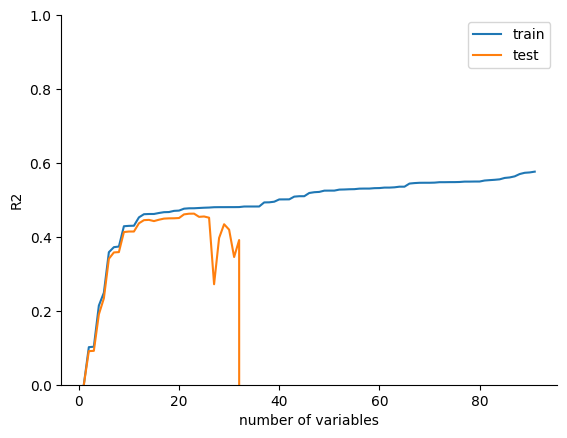

In [18]:
# Now back to our simulation results. To inspect the overfitting of the model
# lets plot R2 and MSE against the number of variables in the model.

# Start with R2
fig, ax = plt.subplots()
ax.plot(res['Number of X Variables'],res['R2 train'],label='train')
ax.plot(res['Number of X Variables'],res['R2 test'],label='test')
ax.set_ylabel('R2')
ax.set_xlabel('number of variables')
ax.set_ylim(0,1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend();

# => Note that in same cases our R2 in the test set is negative, which means
#    that our model is completely off...

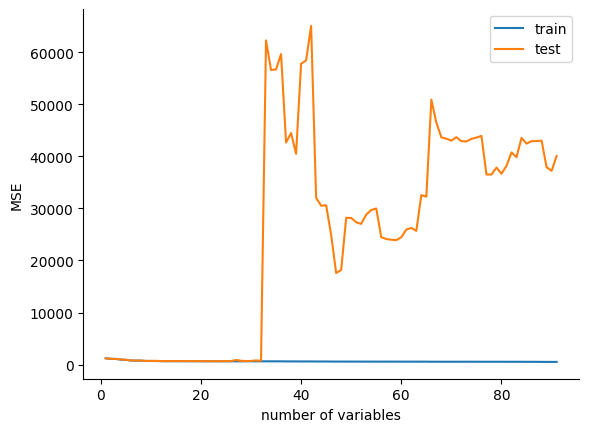

In [19]:
# ... and MSE
fig, ax = plt.subplots()
ax.plot(res['Number of X Variables'],res['MSE Train'],label='train')
ax.plot(res['Number of X Variables'],res['MSE Test'],label='test')
ax.set_ylabel('MSE')
ax.set_xlabel('number of variables')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend();

In [18]:
# =====================================
# Question to discuss in the group:
# =====================================

# What can you conclude from the plots?

In [20]:
# Now, we can find the "best" specification from our simulation
# by checking where R2 is highest in test set
iRes = res.loc[res['R2 test']==res['R2 test'].max(),:]
iRes




,Number of X Variables,New Feature,MSE Train,MSE Test,R2 train,R2 test
numVar_22,23.0,wdpa_2017 mean_elev,635.70165,651.420453,0.477445,0.462873


In [21]:
lstFeatures[:int(iRes['Number of X Variables'])]

array(['1', 'wdpa_2017', 'population_2015', 'chirps_2017', 'maize', 'soy',
       'sugarcane', 'perm_water', 'travel_min', 'cropland', 'mean_elev',
       'sd_elev', 'near_road', 'wdpa_2017^2', 'wdpa_2017 population_2015',
       'wdpa_2017 chirps_2017', 'wdpa_2017 maize', 'wdpa_2017 soy',
       'wdpa_2017 sugarcane', 'wdpa_2017 perm_water',
       'wdpa_2017 travel_min', 'wdpa_2017 cropland',
       'wdpa_2017 mean_elev'], dtype=object)

In [21]:
# =====================================
# Question to discuss in the group:
# =====================================

# Why might this model specification strategy not be ideal?

### Let's see how Lasso could be used here

In [22]:
# The idea is that instead of adding in one variable at a time, we use all
# and let Lasso decide which ones to use.

# It turns out that in order to get better results we need to make
# the problem one step simpler for Lasso. If we use all polynomial terms
# Lasso has convergence issues, at least with the restricted sample size
# that we used above. Apparently the problem is that our variables are too
# correlated. However, we can also illustrate the apporoach by using only linear
# and square terms (excluding the interaction terms).

In [23]:
# Get only the linear and square terms from the polynomials

# idxSq = list(range(0,13))+[lstFeatures.index(c) for c in lstFeatures if '^2' in c]
idxSq = list(range(13)) + [i for i, name in enumerate(lstFeatures) if '^2' in name]
lstColNames = [lstFeatures[i] for i in idxSq]
X_trainSq = X_train_poly[:,idxSq]
X_testSq = X_test_poly[:,idxSq]



In [24]:
# Get actual names for features instead of x1,...,x11
# this is required for a plot further down...
sCols = pd.Series(lstColNames)
sCols = sCols.replace({'\^2':'_sq'},regex=True)
sCols = sCols.replace({'1':'const'},regex=False)
dctReplace = {f"x{i}":lstX[i] for i in range(10,len(lstX))}
sCols = sCols.replace(dctReplace,regex=True)
dctReplace = {f"x{i}":lstX[i] for i in range(0,10)}
sCols = sCols.replace(dctReplace,regex=True)
lstColNames = sCols


In [25]:
# Create a list with alpha (= lambda in the lecture) values that we want to test for our Lasso estimation
# Note: np.logspace returns numbers spaced evenly on a log scale. The sequence
#       starts at base ** start (base to the power of start) and ends with
#       base ** stop (see endpoint below). https://numpy.org/doc/stable/reference/generated/numpy.logspace.html
lstAlpha = np.logspace(start=-16, stop=-3, num = 10, base = 2)
lstAlpha

array([1.52587891e-05, 4.15280151e-05, 1.13021815e-04, 3.07597913e-04,
       8.37152327e-04, 2.27837703e-03, 6.20078536e-03, 1.68759334e-02,
       4.59292029e-02, 1.25000000e-01])

In [26]:
# Now loop over the alphas, run a Lasso estimation and get the model stats
# Note the alphas here are just the same as the penalty (lambda)

# Create a dataframe to hold model stats
resLasso = pd.DataFrame()
# Create a dataframe to hold coef
resCoef = pd.DataFrame(columns=lstColNames)

# Loop over a range of alpha value
for alpha in lstAlpha:
  print(alpha)
  # Estimate Lasso
  if alpha >0:
    # Define a pipeline that first standardized the data, then runs Lasso
    modLasso = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('lasso', Lasso(fit_intercept=True, alpha=alpha))])
    print("lasso is runing with alpha={}".format(alpha))

  else:
    # in case of alpha = 0 use LinearRegression as recommended by sklearn
    modLasso = LinearRegression(fit_intercept=True)

  modLasso.fit(X_trainSq, Y_train)

  # Get predicted values
  Y_hat_train = modLasso.predict(X_trainSq)
  Y_hat_test = modLasso.predict(X_testSq)

  # Get model stats
  resLasso.loc[f"lasso_{alpha}",'MSE Train'] = mean_squared_error(Y_train,Y_hat_train)
  resLasso.loc[f"lasso_{alpha}",'MSE Test'] = mean_squared_error(Y_test,Y_hat_test)
  # The coefficient of determination: 1 is perfect prediction
  resLasso.loc[f"lasso_{alpha}",'R2 train'] = r2_score(Y_train,Y_hat_train)
  resLasso.loc[f"lasso_{alpha}",'R2 test'] = r2_score(Y_test,Y_hat_test)

  resLasso.loc[f"lasso_{alpha}",'alpha'] = alpha

  resCoef.loc[f'beta_hat_alpha{alpha}','alpha',] = alpha
  resCoef.loc[f'beta_hat_alpha{alpha}',lstColNames] = modLasso.named_steps['lasso'].coef_.transpose()


# => As you will see in the output, there are some values of alpha for which
#   Lasso does not converge. This is not ideal but for our results we can
#   ignore this for now.
# => Again check how MSE and R2 developed for varying values of alpha

resLasso

1.52587890625e-05
lasso is runing with alpha=1.52587890625e-05
4.152801514204032e-05
lasso is runing with alpha=4.152801514204032e-05


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.756e+05, tolerance: 2.433e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.463e+05, tolerance: 2.433e+02
  model = cd_fast.enet_coordinate_descent(


0.00011302181546475716
lasso is runing with alpha=0.00011302181546475716
0.00030759791257199025
lasso is runing with alpha=0.00030759791257199025


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.770e+05, tolerance: 2.433e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.431e+05, tolerance: 2.433e+02
  model = cd_fast.enet_coordinate_descent(


0.0008371523270049544
lasso is runing with alpha=0.0008371523270049544
0.0022783770304221013
lasso is runing with alpha=0.0022783770304221013


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.710e+05, tolerance: 2.433e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.187e+04, tolerance: 2.433e+02
  model = cd_fast.enet_coordinate_descent(


0.006200785359250777
lasso is runing with alpha=0.006200785359250777
0.01687593342019228
lasso is runing with alpha=0.01687593342019228


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.007e+04, tolerance: 2.433e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.528e+03, tolerance: 2.433e+02
  model = cd_fast.enet_coordinate_descent(


0.045929202883612456
lasso is runing with alpha=0.045929202883612456
0.125
lasso is runing with alpha=0.125


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.168e+02, tolerance: 2.433e+02
  model = cd_fast.enet_coordinate_descent(


,MSE Train,MSE Test,R2 train,R2 test,alpha
lasso_1.52587890625e-05,593.655664,627.785045,0.512007,0.482362,0.000015
lasso_4.152801514204032e-05,593.655673,627.781163,0.512007,0.482365,0.000042
lasso_0.00011302181546475716,593.655720,627.770625,0.512007,0.482373,0.000113
lasso_0.00030759791257199025,593.656013,627.742141,0.512007,0.482397,0.000308
lasso_0.0008371523270049544,593.658038,627.666091,0.512005,0.482460,0.000837
lasso_0.0022783770304221013,593.672640,627.469994,0.511993,0.482621,0.002278
lasso_0.006200785359250777,593.779718,627.016906,0.511905,0.482995,0.006201
lasso_0.01687593342019228,594.569898,626.380841,0.511256,0.483519,0.016876
lasso_0.045929202883612456,597.385183,625.602255,0.508942,0.484161,0.045929
lasso_0.125,612.069319,634.717203,0.496871,0.476646,0.125000


In [27]:
resCoef

,const,wdpa_2017,population_2015,chirps_2017,maize,soy,sugarcane,perm_water,travel_min,cropland,...,maize_sq,soy_sq,sugarcane_sq,perm_water_sq,travel_min_sq,cropland_sq,mean_elev_sq,sd_elev_sq,near_road_sq,alpha
beta_hat_alpha1.52587890625e-05,0.0,12.172622,-3.490122,-43.319095,21.270404,-19.015251,13.7839,4.051564,15.469775,1.778026,...,-6.853166,5.538042,-13.65919,-5.694835,-8.269063,-1.618349,-13.95906,-5.723816,-13.027105,0.000015
beta_hat_alpha4.152801514204032e-05,0.0,12.163646,-3.489472,-43.309389,21.267043,-19.007479,13.77832,4.048603,15.469425,1.777893,...,-6.84955,5.531096,-13.654007,-5.691749,-8.268596,-1.618175,-13.956636,-5.723825,-13.026351,0.000042
beta_hat_alpha0.00011302181546475716,0.0,12.139217,-3.487702,-43.282972,21.257896,-18.986325,13.763134,4.040543,15.468471,1.777531,...,-6.83971,5.512189,-13.639902,-5.683351,-8.267324,-1.617701,-13.950041,-5.723851,-13.024299,0.000113
beta_hat_alpha0.00030759791257199025,0.0,12.072733,-3.482885,-43.211078,21.233001,-18.928754,13.721805,4.018608,15.465874,1.776546,...,-6.81293,5.460734,-13.601512,-5.660493,-8.263863,-1.616412,-13.932093,-5.723921,-13.018716,0.000308
beta_hat_alpha0.0008371523270049544,0.0,11.891789,-3.469773,-43.015413,21.165249,-18.772069,13.609324,3.95891,15.458807,1.773866,...,-6.740045,5.320695,-13.497031,-5.598285,-8.254442,-1.612903,-13.883244,-5.724111,-13.003519,0.000837
beta_hat_alpha0.0022783770304221013,0.0,11.399342,-3.43409,-42.482861,20.980862,-18.345646,13.303204,3.796437,15.439575,1.766571,...,-6.541685,4.939574,-13.212686,-5.428979,-8.228802,-1.603354,-13.750296,-5.72463,-12.962164,0.002278
beta_hat_alpha0.006200785359250777,0.0,10.059119,-3.336975,-41.033428,20.479045,-17.185116,12.470087,3.354251,15.387232,1.746719,...,-6.001836,3.902334,-12.43883,-4.968197,-8.159021,-1.577365,-13.388466,-5.726039,-12.849615,0.006201
beta_hat_alpha0.01687593342019228,0.0,6.411585,-3.072668,-37.088464,19.113364,-14.026722,10.202748,2.150807,15.244777,1.692693,...,-4.532622,1.079468,-10.332782,-3.714142,-7.969107,-1.506637,-12.403706,-5.729871,-12.543321,0.016876
beta_hat_alpha0.045929202883612456,0.0,4.854369,-2.365452,-26.860929,17.373855,-11.321859,7.929099,0.0,14.924512,1.554003,...,-2.57046,-0.955806,-8.390124,-1.48132,-7.483928,-1.328515,-9.818752,-5.559649,-11.718294,0.045929
beta_hat_alpha0.125,0.0,5.047124,-0.745085,-0.0,16.394599,-3.534653,0.0,-0.0,14.281127,1.181557,...,0.0,-7.70088,-1.876092,-1.241894,-6.340734,-0.86748,-4.817084,-4.900899,-9.604003,0.125000


In [28]:
# Get the "best" alpha by checking where MSE is lowest in test set
# (or R2 is highest)
iRes = resLasso.loc[resLasso['R2 test']==resLasso['R2 test'].max(),:]
alphaBest = resLasso.loc[resLasso['R2 test']==resLasso['R2 test'].max(),'alpha'][0]
print('The "best" alpha (from those we tried in the simulations) is: ', alphaBest)

The "best" alpha (from those we tried in the simulations) is:  0.045929202883612456


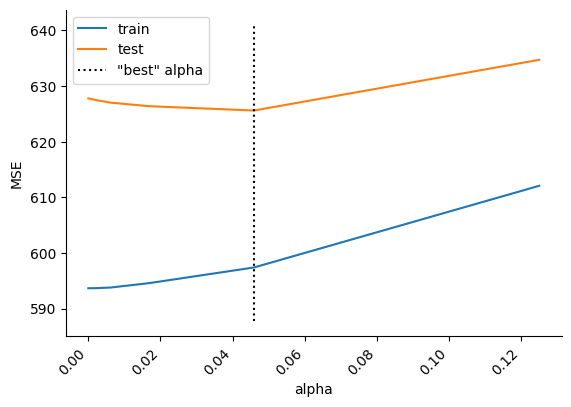

In [29]:
# Plot result

# Define range of Y that should be shown in plot
rangeYLow = resLasso['MSE Train'].min()*0.99
rangeYHigh = resLasso['MSE Test'].max()*1.01

fig, ax = plt.subplots()
ax.plot(resLasso['alpha'],resLasso['MSE Train'],label='train')
ax.plot(resLasso['alpha'],resLasso['MSE Test'],label='test')
ax.plot([alphaBest,alphaBest],[rangeYLow,rangeYHigh],label='"best" alpha',linestyle=':',color='black')
ax.set_ylabel('MSE')
ax.set_xlabel('alpha')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
fig.autofmt_xdate(rotation=45)
# ax.set_ylim(rangeYLow,rangeYHigh)
ax.legend();

In [30]:
# Repeat the simulation with a slightly larger alpha range
# in order to prepare a plot with the estimated coefficients against alpha
# Df to hold coef
resCoef = pd.DataFrame(columns=lstColNames)

# Loop over a range of alpha value
for alpha in np.logspace(-16, 0, num = 10, base = 2):
  # Estimate Lasso
  if alpha >0:
     modLasso = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('lasso', Lasso(fit_intercept=True, alpha=alpha))])
  else:
    # in case of alpha = 0 use LinearRegression as recommended by sklearn
    modLasso = LinearRegression(fit_intercept=True)
  modLasso.fit(X_trainSq, Y_train)

  resCoef.loc[f'beta_hat_alpha{alpha}','alpha',] = alpha
  resCoef.loc[f'beta_hat_alpha{alpha}',lstColNames] = modLasso.named_steps['lasso'].coef_.transpose()


import plotly.graph_objects as go
# Create traces
fig = go.Figure()

for strBeta in resCoef.columns[1:]:
  # ax.plot(resCoef['alpha'],resPlot[strBeta],label=strBeta)
  fig.add_trace(go.Scatter(x=resCoef['alpha'], y=resCoef[strBeta],
                      mode='lines',
                      name=strBeta))

rangeYLow = resCoef.min().min()*0.99
rangeYHigh = resCoef.max().max()*1.01
fig.add_trace(go.Scatter(x=[alphaBest,alphaBest], y=[rangeYLow,rangeYHigh],
                    mode='lines',
                    name='bestAlpha',line=dict(color='black', dash='dash')))

fig.update_layout(
    width=800,
    height=400,
    xaxis_type="log",
    xaxis = dict(
       autorange='reversed'
    ),
    yaxis = dict(
       range=[rangeYLow,rangeYHigh],
    )
)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.756e+05, tolerance: 2.433e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.349e+05, tolerance: 2.433e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.237e+05, tolerance: 2.433e

# Day 1 Lab

Today's lab will have you run an OLS and LASSO regression using the deforestation data you saw in the introduction slides and today's lecture (see code above).

In the above specification we work with a rather restricted, preselected set of explanatory variables. Also, we restricted the sample size artificially. Now try to run a model with a larger set of explanatory variables and using the full data set.

In [32]:
# Define target (dependent) variable (% forest cover for 2018)
strY = 'perc_treecover'

# Define a list of features names (explantory variables)
lstX = [
  'bean',
 'carrot',
 'cassava',
 'chickpea',
 'citrus',
 'coffee',
 'groundnut',
 'maize',
 'soy',
 'sugarcane',
 'tomato',
 'wheat',
 'perm_water',
 'travel_min',
 'defor_2001',
 'defor_2002',
 'defor_2003',
 'defor_2004',
 'defor_2005',
 'defor_2006',
 'defor_2007',
 'defor_2008',
 'defor_2009',
 'defor_2010',
 'defor_2011',
 'defor_2012',
 'defor_2013',
 'defor_2014',
 'defor_2015',
 'defor_2016',
 'defor_2017',
 'defor_2018',
 'wdpa_1990',
 'wdpa_1991',
 'wdpa_1993',
 'wdpa_1994',
 'wdpa_1995',
 'wdpa_1996',
 'wdpa_1997',
 'wdpa_1998',
 'wdpa_1999',
 'wdpa_2000',
 'wdpa_2001',
 'wdpa_2002',
 'wdpa_2003',
 'wdpa_2004',
 'wdpa_2005',
 'wdpa_2006',
 'wdpa_2007',
 'wdpa_2008',
 'wdpa_2009',
 'wdpa_2010',
 'wdpa_2011',
 'wdpa_2012',
 'wdpa_2014',
 'wdpa_2015',
 'wdpa_2017',
 'wdpa_2018',
 'chirps_2001',
 'chirps_2002',
 'chirps_2003',
 'chirps_2004',
 'chirps_2005',
 'chirps_2006',
 'chirps_2007',
 'chirps_2008',
 'chirps_2009',
 'chirps_2010',
 'chirps_2011',
 'chirps_2012',
 'chirps_2013',
 'chirps_2014',
 'chirps_2015',
 'chirps_2016',
 'chirps_2017',
 'chirps_2018',
 'population_2000',
 'population_2005',
 'population_2010',
 'population_2015',
 'cropland',
 'pasture',
 'mean_elev',
 'sd_elev',
 'near_road',
 'bean_lag_1st_order',
 'carrot_lag_1st_order',
 'cassava_lag_1st_order',
 'chickpea_lag_1st_order',
 'citrus_lag_1st_order',
 'coffee_lag_1st_order',
 'groundnut_lag_1st_order',
 'maize_lag_1st_order',
 'soy_lag_1st_order',
 'sugarcane_lag_1st_order',
 'tomato_lag_1st_order',
 'wheat_lag_1st_order',
 'perm_water_lag_1st_order',
 'travel_min_lag_1st_order',
 'defor_2001_lag_1st_order',
 'defor_2002_lag_1st_order',
 'defor_2003_lag_1st_order',
 'defor_2004_lag_1st_order',
 'defor_2005_lag_1st_order',
 'defor_2006_lag_1st_order',
 'defor_2007_lag_1st_order',
 'defor_2008_lag_1st_order',
 'defor_2009_lag_1st_order',
 'defor_2010_lag_1st_order',
 'defor_2011_lag_1st_order',
 'defor_2012_lag_1st_order',
 'defor_2013_lag_1st_order',
 'defor_2014_lag_1st_order',
 'defor_2015_lag_1st_order',
 'defor_2016_lag_1st_order',
 'defor_2017_lag_1st_order',
 'defor_2018_lag_1st_order',
 'wdpa_1990_lag_1st_order',
 'wdpa_1991_lag_1st_order',
 'wdpa_1993_lag_1st_order',
 'wdpa_1994_lag_1st_order',
 'wdpa_1995_lag_1st_order',
 'wdpa_1996_lag_1st_order',
 'wdpa_1997_lag_1st_order',
 'wdpa_1998_lag_1st_order',
 'wdpa_1999_lag_1st_order',
 'wdpa_2000_lag_1st_order',
 'wdpa_2001_lag_1st_order',
 'wdpa_2002_lag_1st_order',
 'wdpa_2003_lag_1st_order',
 'wdpa_2004_lag_1st_order',
 'wdpa_2005_lag_1st_order',
 'wdpa_2006_lag_1st_order',
 'wdpa_2007_lag_1st_order',
 'wdpa_2008_lag_1st_order',
 'wdpa_2009_lag_1st_order',
 'wdpa_2010_lag_1st_order',
 'wdpa_2011_lag_1st_order',
 'wdpa_2012_lag_1st_order',
 'wdpa_2014_lag_1st_order',
 'wdpa_2015_lag_1st_order',
 'wdpa_2017_lag_1st_order',
 'wdpa_2018_lag_1st_order',
 'chirps_2001_lag_1st_order',
 'chirps_2002_lag_1st_order',
 'chirps_2003_lag_1st_order',
 'chirps_2004_lag_1st_order',
 'chirps_2005_lag_1st_order',
 'chirps_2006_lag_1st_order',
 'chirps_2007_lag_1st_order',
 'chirps_2008_lag_1st_order',
 'chirps_2009_lag_1st_order',
 'chirps_2010_lag_1st_order',
 'chirps_2011_lag_1st_order',
 'chirps_2012_lag_1st_order',
 'chirps_2013_lag_1st_order',
 'chirps_2014_lag_1st_order',
 'chirps_2015_lag_1st_order',
 'chirps_2016_lag_1st_order',
 'chirps_2017_lag_1st_order',
 'chirps_2018_lag_1st_order',
 'population_2000_lag_1st_order',
 'population_2005_lag_1st_order',
 'population_2010_lag_1st_order',
 'population_2015_lag_1st_order',
 'cropland_lag_1st_order',
 'pasture_lag_1st_order',
 'mean_elev_lag_1st_order',
 'sd_elev_lag_1st_order',
 'near_road_lag_1st_order',
 ]

# Get target variable and features
Y_all = df[strY]
X_all = df.loc[:,lstX]


In [33]:
# split the data into a train and test set as above
# ==============
# Set a random number seed such that everybody has the same "random" split
# of the data
np.random.seed(111)
# Split the data into train and test data using sklearn train_test_split object
#   (see: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

#   Note: This randomly split the data in 80% train and 20% test data
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size = 0.2)
# ==============

In [34]:
# Run an OLS model to predict percent forest cover (using the 'train' part of the previous split for the training)
# ==============
# Your code here
# ==============
# Define model (automatically add a constant)
regOls = LinearRegression(fit_intercept=True)


# Train the model using the training sets
regOls.fit(X_train, Y_train)


LinearRegression()

In [35]:
# Generate the predicted values for forest cover in the train and test set
# ==============
Y_hat_train = regOls.predict(X_train)
Y_hat_test = regOls.predict(X_test)
# ==============

In [36]:
# Produce measures of model fit (R2 and MSE) for train and test data
# ==============
  # The mean squared error
MSE_Train = mean_squared_error(Y_train,Y_hat_train)
MSE_Test = mean_squared_error(Y_test,Y_hat_test)

R2_train = r2_score(Y_train,Y_hat_train)
R2_test = r2_score(Y_test,Y_hat_test)


print('Results for Train:')
print('R2', R2_train)
print('MSE', MSE_Train)

print('\nResults for Test')
print('R2 ', R2_test)
print('MSE ', MSE_Test)
# ==============

Results for Train:
R2 0.6070747085227717
MSE 475.90698004040917

Results for Test
R2  0.606733403783617
MSE  476.94849845414046


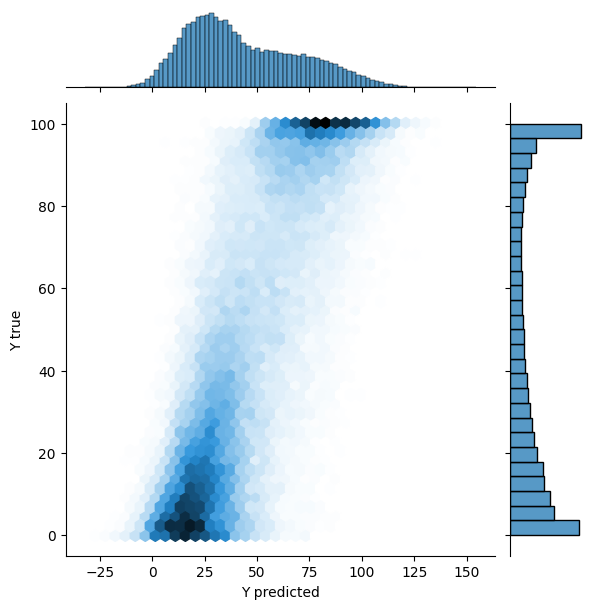

In [37]:
# plot predicted versus actual forest cover for test set
# ==============
# plot Y vs Y-hat
h = sns.jointplot(x= Y_hat_test, y=Y_test, kind="hex")
h.set_axis_labels('Y predicted', 'Y true');
# ==============

Now run the same specification using a LASSO

In [44]:
# generate a LASSO function from sklearn
# ==============
# Your code here

modLasso = Lasso(fit_intercept=True, alpha = 0.001)
# ==============

In [45]:
# Use the same variable specification as for your OLS model and fit it
# to the training data
# ==============
# Your code here
modLasso.fit(X_train, Y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.968e+07, tolerance: 2.422e+04



Lasso(alpha=0.009)

In [47]:
# Create fitted values for train and test set and compare model fit (R2/MSE)
# as you have done it for OLS
# ==============

  # Get predicted values
Y_hat_train = modLasso.predict(X_train)
Y_hat_test = modLasso.predict(X_test)

  # Get model stats
MSE_Lasso_Train = mean_squared_error(Y_train, Y_hat_train)
MSE_Lasso_Test = mean_squared_error(Y_test, Y_hat_test)

R2_Lasso_Train = r2_score(Y_train,Y_hat_train)
R2_Lasso_Test = r2_score(Y_test,Y_hat_test)

print('Results for Train:')
print('R2', R2_Lasso_Train)
print('MSE', MSE_Lasso_Train)

print('\nResults for Test')
print('R2 ', R2_Lasso_Test)
print('MSE ', MSE_Lasso_Test)

Results for Train:
R2 0.6002961679328351
MSE 484.1170771026518

Results for Test
R2  0.6002652124481118
MSE  484.79303489548585


In [49]:
# Check how many coefficients are selected in Lasso (i.e. are greater 0)
print('Number of total coefficients in Lasso: ' , modLasso.coef_.shape[0])
print('Number of selected coefficients in Lasso: ' ,np.sum(modLasso.coef_>0))


print('\nList selected variables:\n')
list(pd.Series(lstX).loc[modLasso.coef_>0])

Number of total coefficients in Lasso:  170
Number of selected coefficients in Lasso:  79

List selected variables:



['bean',
 'cassava',
 'chickpea',
 'citrus',
 'coffee',
 'maize',
 'tomato',
 'wheat',
 'travel_min',
 'defor_2001',
 'defor_2002',
 'defor_2003',
 'defor_2004',
 'defor_2005',
 'defor_2006',
 'defor_2007',
 'defor_2008',
 'defor_2009',
 'defor_2010',
 'defor_2011',
 'defor_2012',
 'defor_2013',
 'defor_2014',
 'defor_2015',
 'defor_2016',
 'defor_2017',
 'defor_2018',
 'wdpa_1991',
 'wdpa_1994',
 'wdpa_1996',
 'wdpa_1999',
 'wdpa_2001',
 'wdpa_2005',
 'wdpa_2006',
 'wdpa_2009',
 'chirps_2005',
 'chirps_2006',
 'chirps_2008',
 'chirps_2009',
 'chirps_2010',
 'chirps_2012',
 'chirps_2013',
 'chirps_2014',
 'chirps_2015',
 'chirps_2016',
 'population_2005',
 'population_2010',
 'pasture',
 'sd_elev',
 'near_road',
 'bean_lag_1st_order',
 'cassava_lag_1st_order',
 'citrus_lag_1st_order',
 'maize_lag_1st_order',
 'sugarcane_lag_1st_order',
 'tomato_lag_1st_order',
 'defor_2003_lag_1st_order',
 'defor_2004_lag_1st_order',
 'defor_2005_lag_1st_order',
 'defor_2010_lag_1st_order',
 'defor_201

Now change your alpha (lambda) and repeat.  

What happens as you increase your alphas? As you decrease your alphas? Are the results more or less similar to your OLS results?

Note: In this specific case it might be quite difficult to beat the simple OLS result in terms of MSE/R2 in the test set, because OLS is not really overfitting in this example.   

(Optional) So far we are just choosing our training and test set randomly.  Is this valid if there is high spatial correlation?  (if you like) try splitting your data based on latitude and re-run the OLS and the LASSO.  Do you expect your results to be better or worse than using the random split?

In [42]:
# set a cut-point in the latitude variable to split data into a train and test set

In [43]:
# re-run OLS and LASSO models using this new train and test set
